In [2]:
from rdflib import Graph, RDF, URIRef, Namespace
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
# custom packages
import sys
sys.path.append( "../py" )
import collaboration

In [3]:
import importlib
importlib.reload(collaboration)

<module 'collaboration' from '../py/collaboration.py'>

In [4]:
g, ns = collaboration.parse_graph("../graph/experiment_graph.ttl", "turtle")

In [113]:
collaboration.two_layer_recommendation(3, mashup_api, api_mashup)

[(5, 0.022312467987428804),
 (22, 0.018514586158126824),
 (20, 0.017430323416340557),
 (4, 0.011138100313772638),
 (36, 0.0092641314624073226),
 (2, 0.0074452153512952115),
 (111, 0.006559281236005376),
 (86, 0.0055277482398625776),
 (211, 0.00531197131412649),
 (26, 0.0050616529064804947),
 (24, 0.0047812003826894125),
 (27, 0.0047387418615866886),
 (51, 0.0045597159238678813),
 (182, 0.0043506720769651824),
 (3, 0.0040933503756779618),
 (105, 0.004000680832577385),
 (23, 0.0037689365667422092),
 (53, 0.0035732945215703848),
 (127, 0.0034704544799826109),
 (58, 0.0034365897512449238),
 (110, 0.0030293602687803314),
 (250, 0.0030285925760063694),
 (43, 0.0028710584304236344),
 (179, 0.0026962979549186449),
 (19, 0.002430974198215577),
 (240, 0.0023518315059521131),
 (18, 0.0023374399848991503),
 (199, 0.0022966736328805292),
 (200, 0.0022671435582877586),
 (50, 0.0022085912172119066),
 (88, 0.0019991861586689174),
 (419, 0.0019561915574846608),
 (126, 0.0018357839478529128),
 (612, 0.0

###Evaluation###

In [5]:
df = collaboration.create_relatiobships_df(g, ns, "api_network:Mashup", "api_network:API", "gr:include")

In [11]:
mashup_api, api_mashup, mashup_legend, api_legend = collaboration.create_bipartite_graph(g, ns, df)

In [6]:
msk = np.random.rand(len(df)) < 0.9

In [7]:
train_df = df[msk]
test_df = df[~msk]

In [8]:
# Predicted position of the entry. e.g. if actual item is in the 30th place of the ordered queue of 1500 uncollected
# entries, then we say that r = 30/1500
mashup_legend, reversed_mashup_legend = collaboration.create_legend_and_reversed_legend("Mashup", df)
api_legend, reversed_api_legend = collaboration.create_legend_and_reversed_legend("API", df)

train_mashup_api = collaboration.create_relationship_dictionary("Mashup", "API", mashup_legend, reversed_api_legend, train_df)
train_api_mashup = collaboration.create_relationship_dictionary("API", "Mashup", api_legend, reversed_mashup_legend, train_df)

test_mashup_api = collaboration.create_relationship_dictionary("Mashup", "API", mashup_legend, reversed_api_legend, test_df)

In [84]:
len(mashup_api)

7584

In [ ]:
with_lengths = {}
for a,m in train_api_mashup.items():
    with_lengths[a]=len(m)
sorted_apis = sorted(with_lengths.items(), key=operator.itemgetter(1), reverse=True)

In [77]:
GRM_result = []
for m,value in test_mashup_api.items():
    if value != mashup_api[m]:
        for api in value:
            recommended_tuple = [i for i in sorted_apis if i[0] == api]
            if recommended_tuple:
                GRM_result.append(sorted_apis.index(recommended_tuple[0])/1491)#len(sorted_apis))
            else:
                GRM_result.append(1)
#api_legend[3]

In [78]:
NBI_result = []
for m,value in test_mashup_api.items():
    if value:
        if value != mashup_api[m]:
            recomm = collaboration.two_layer_recommendation(m, train_mashup_api, train_api_mashup)
            for api in value:
                recommended_tuple = [i for i in recomm if i[0] == api]
                if recommended_tuple:
                    NBI_result.append(recomm.index(recommended_tuple[0])/1491)#len(recomm)) # find position of test item in recommendation list
                else:
                    NBI_result.append(1)

In [81]:
len(NBI_result)
#plt.hist(result, cumulative=True, bins = 100)

1131

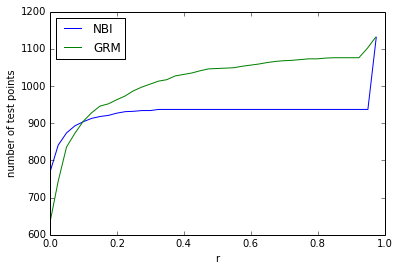

In [82]:
# evaluate the histogram
values, base = np.histogram(NBI_result, bins=40)
values1, base1 = np.histogram(GRM_result, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
cumulative1 = np.cumsum(values1)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue', label="NBI") # Network Based Inference
plt.plot(base1[:-1], cumulative1, c='green', label="GRM") # Global Ranking Method
plt.ylabel("number of test points")
plt.xlabel("r")
plt.legend(loc=2)
#plt.savefig("Mashup-API-performance")